In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

# loading the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

#
target_variable = 'price' 

# drop rows with missing target variable values
data = data.dropna(subset=[target_variable])

#
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Remove columns with any missing values
X = X.dropna(axis=1, how='any')

# one hot encode
X = pd.get_dummies(X, drop_first=True)

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
lr = LinearRegression()
lr.fit(X_train, y_train)

#
y_pred_lr = lr.predict(X_test)

#
r2_lr = r2_score(y_test, y_pred_lr)


print(f'Linear Regression R²: {r2_lr:.4f}')




Linear Regression R²: 0.0042


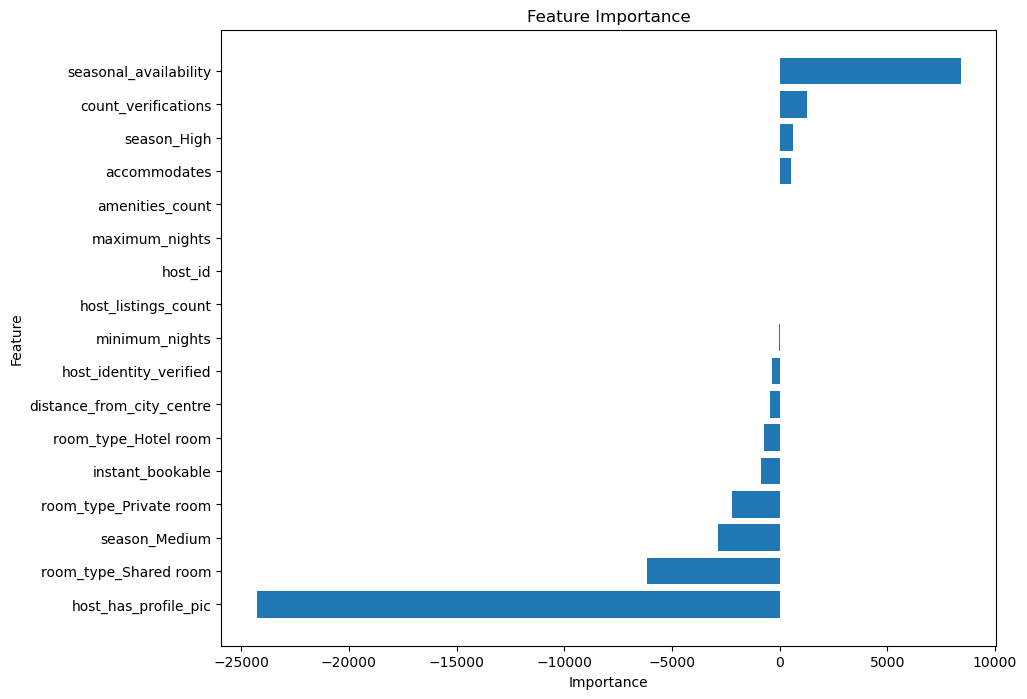

,Feature,Importance
10,seasonal_availability,8427.041371
9,count_verifications,1287.096901
16,season_High,644.239763
4,accommodates,513.117822
8,amenities_count,36.100725
6,maximum_nights,3.250347
0,host_id,0.000004
1,host_listings_count,-3.182082
5,minimum_nights,-6.662793
3,host_identity_verified,-371.059454


In [3]:
# display the importance of attributes
coefficients = lr.coef_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#
feature_importances.head(10)